<a href="https://colab.research.google.com/github/Abi-DS/BCSE331L-EDA-Project/blob/main/22BDS0122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BCSE331L - EDA - Course Project [Phase 1]
##Abinanthan S
## 22BDS0122

### 1. Setup and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")

# Load the dataset from the file
df = pd.read_csv('Gunnels.csv')

# Drop the 'rownames' column as it is just an index
df = df.drop('rownames', axis=1)

# Display the first 5 rows to verify
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
0,0,786,190,10,0.1,0,3,0,0,0
1,0,794,182,10,0.0,0,3,0,0,0
2,0,798,178,20,0.0,0,1,0,0,0
3,0,800,176,70,0.3,0,1,0,1,0
4,0,804,172,40,0.3,0,1,0,1,0


### 2. Explore Dimensions and Summary


In [2]:
# -- Dimensions of the Dataset --
print(f"After dropping 'rownames', the dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("-" * 50)

# -- Summary Statistics and Data Types --
print("Dataset Information (Data Types and Non-Null Counts):")
df.info()
print("-" * 50)

# -- Statistical Summary for Numerical Columns --
print("Statistical Summary:")
df.describe()

After dropping 'rownames', the dataset has 1592 rows and 10 columns.
--------------------------------------------------
Dataset Information (Data Types and Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gunnel   1592 non-null   int64  
 1   Time     1592 non-null   int64  
 2   Fromlow  1592 non-null   int64  
 3   Slope    1592 non-null   int64  
 4   Rw       1592 non-null   float64
 5   Amphiso  1592 non-null   int64  
 6   Subst    1592 non-null   int64  
 7   Pool     1592 non-null   int64  
 8   Water    1592 non-null   int64  
 9   Cobble   1592 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 124.5 KB
--------------------------------------------------
Statistical Summary:


,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,0.030151,705.243719,149.408920,9.503769,0.527073,0.464196,3.105528,0.202261,0.508794,0.190955
std,0.171056,135.853638,82.662326,15.889862,0.421278,0.899039,2.787720,0.401812,0.500080,0.393177
min,0.000000,340.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,623.000000,71.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,712.500000,158.000000,0.000000,0.600000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,0.000000,810.000000,224.250000,10.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000
max,1.000000,983.000000,304.000000,90.000000,1.000000,4.000000,13.000000,1.000000,1.000000,1.000000


### 3. Data Cleaning and Handling


In [3]:
# -- Data Cleaning --

# 1. Check for missing values (already confirmed none, but good practice)
print("Missing values in each column:")
print(df.isnull().sum())
print("-" * 50)

# 2. Check for and remove duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {num_duplicates}")

if num_duplicates > 0:
    print("Removing duplicate rows...")
    df.drop_duplicates(inplace=True)
    print(f"Dataset shape after removing duplicates: {df.shape}")
else:
    print("No duplicates to remove.")

Missing values in each column:
Gunnel     0
Time       0
Fromlow    0
Slope      0
Rw         0
Amphiso    0
Subst      0
Pool       0
Water      0
Cobble     0
dtype: int64
--------------------------------------------------
Number of duplicate rows found: 90
Removing duplicate rows...
Dataset shape after removing duplicates: (1502, 10)


### 4. Univariate Analysis



Performing Univariate Analysis...


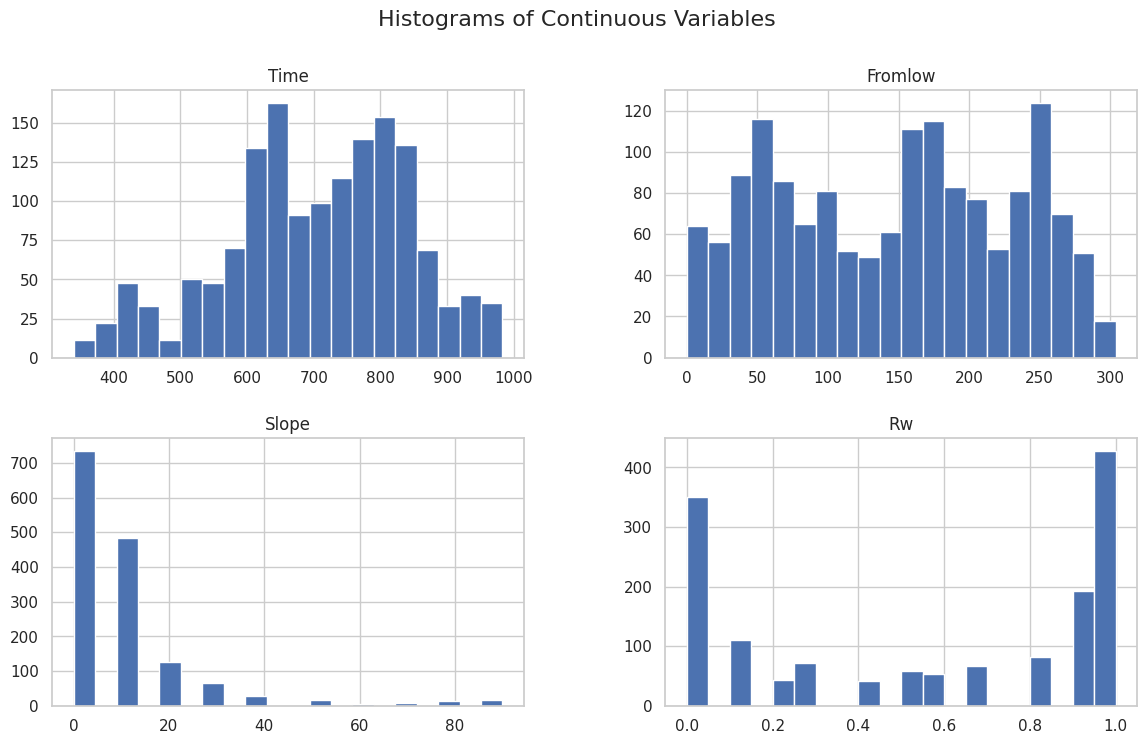

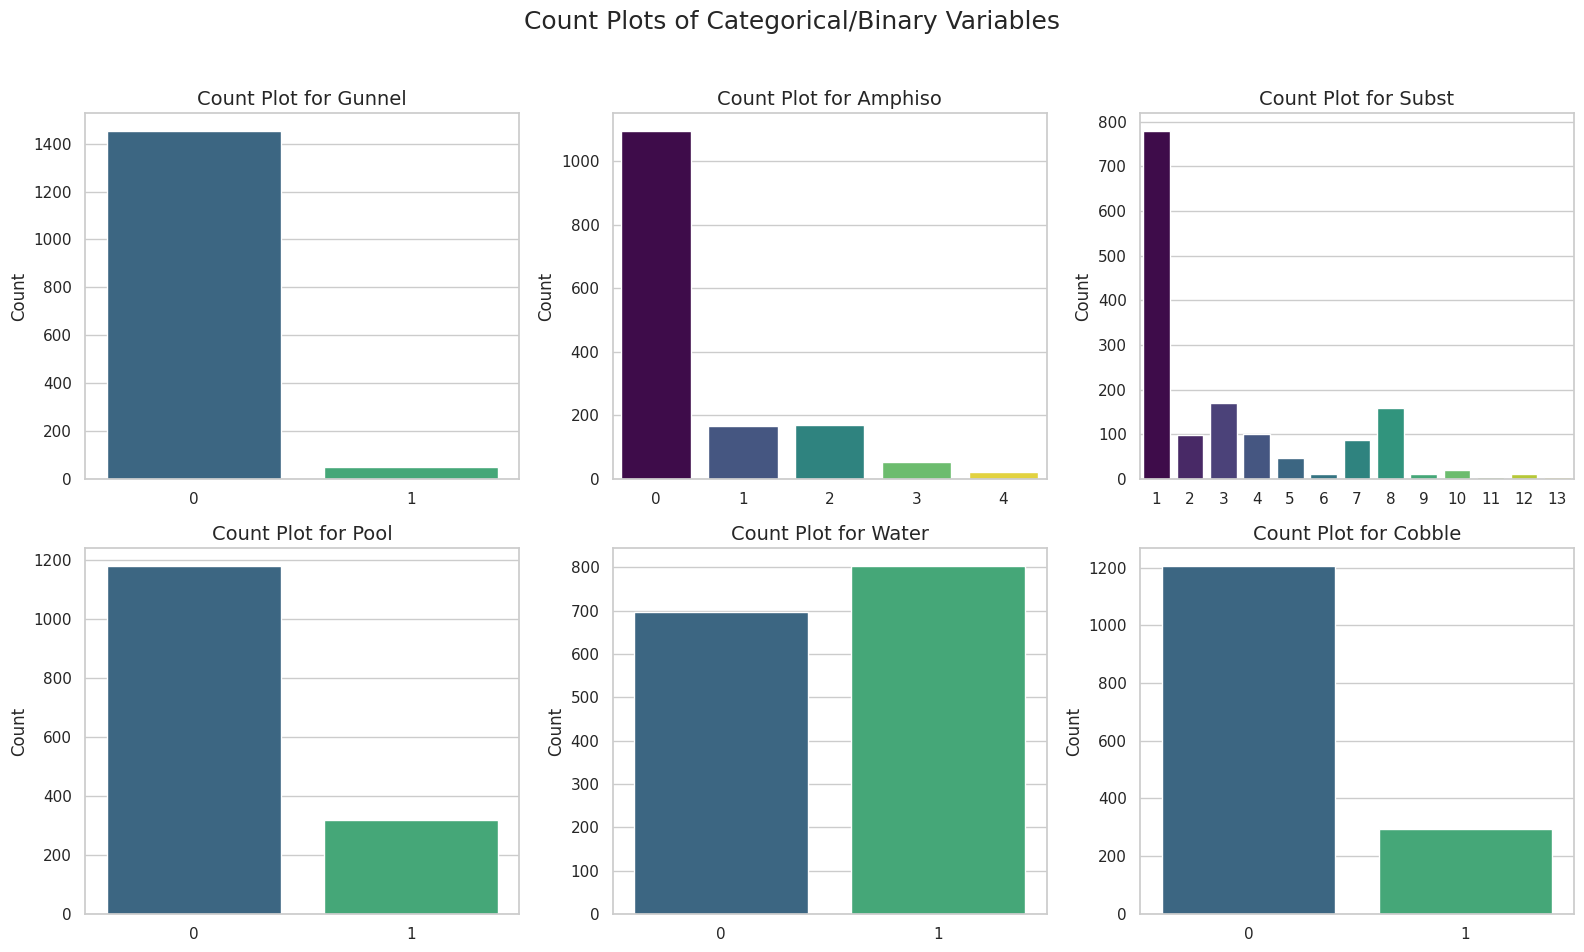

In [5]:
print("\nPerforming Univariate Analysis...")

# -- Histograms for Continuous Variables --
continuous_cols = ['Time', 'Fromlow', 'Slope', 'Rw']
df[continuous_cols].hist(bins=20, figsize=(14, 8))
plt.suptitle('Histograms of Continuous Variables', size=16)
plt.show()


# -- Count Plots for Categorical/Binary Variables --
categorical_cols = ['Gunnel', 'Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue=col, palette='viridis', legend=False)
    axes[i].set_title(f'Count Plot for {col}', size=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.suptitle('Count Plots of Categorical/Binary Variables', size=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

### 5. Bivariate Analysis



Performing Bivariate Analysis...


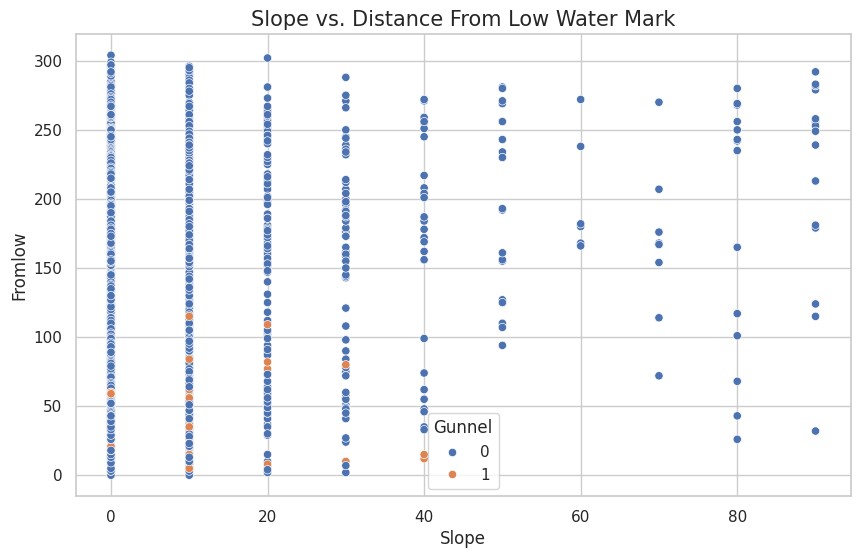

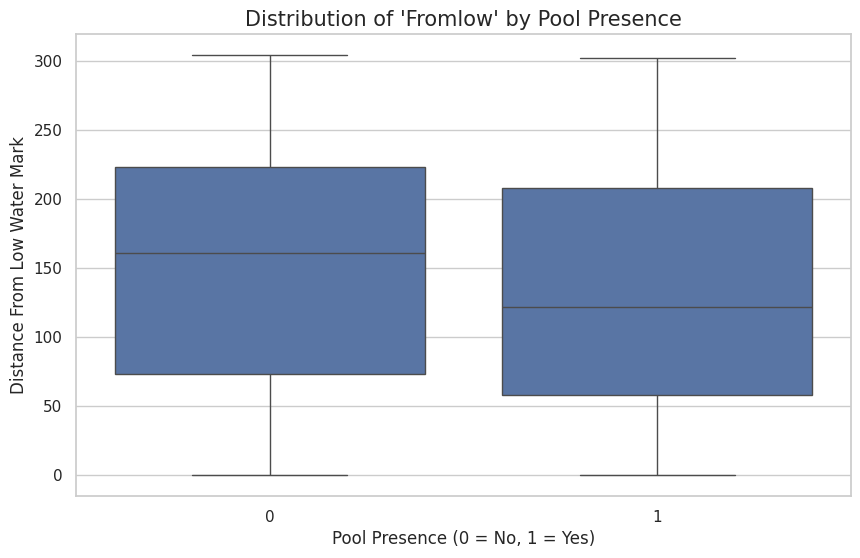

In [6]:
print("\nPerforming Bivariate Analysis...")

# -- Scatter Plot: Slope vs. Fromlow --
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Slope', y='Fromlow', data=df, hue='Gunnel', palette='deep')
plt.title('Slope vs. Distance From Low Water Mark', size=15)
plt.show()

# -- Box Plot: Distribution of 'Fromlow' for each 'Pool' category --
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pool', y='Fromlow', data=df)
plt.title("Distribution of 'Fromlow' by Pool Presence", size=15)
plt.xlabel("Pool Presence (0 = No, 1 = Yes)")
plt.ylabel("Distance From Low Water Mark")
plt.show()

### 6. Multivariate Analysis



Performing Multivariate Analysis...


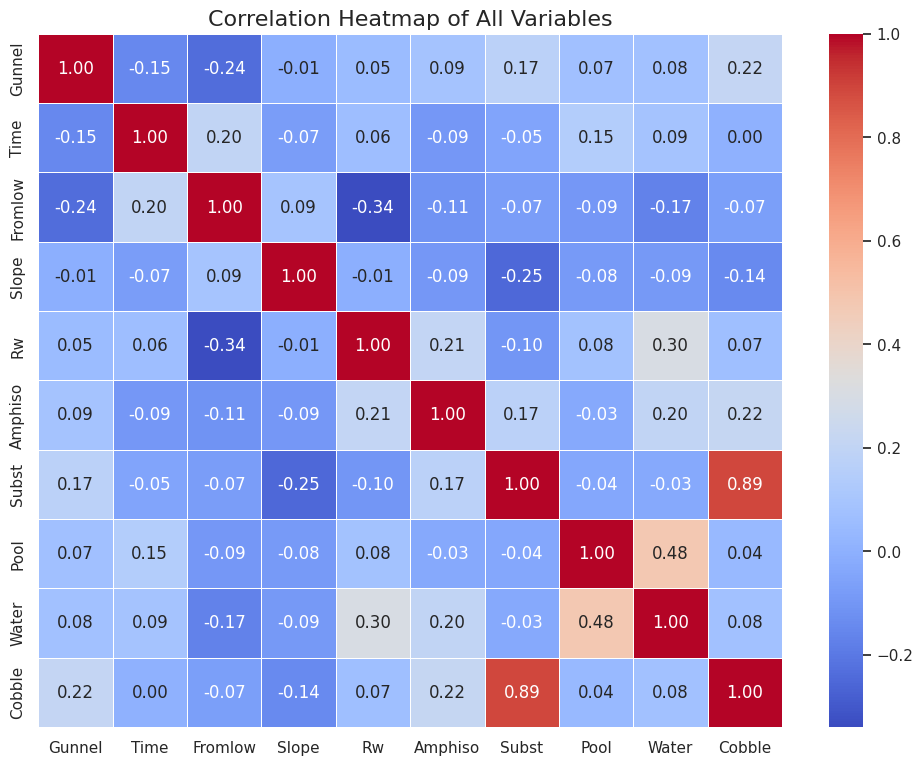

In [7]:
print("\nPerforming Multivariate Analysis...")

# -- Correlation Heatmap --
plt.figure(figsize=(12, 9))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of All Variables', size=16)
plt.show()